## Analysis

#### 1. Closer the city is to Equator, more the temperature is

#### 2. Away the city is from the Equator, more are the wind speeds.

In [90]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import openweathermapy as own

In [64]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

# Generating random latitudes and longitudes
lat = np.random.uniform(low=-90, high=90, size=2000)
lng = np.random.uniform(low=-180, high=180, size=2000)

coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))
# Finding the cities 
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))



In [65]:
# Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code

In [66]:
# Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

# Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,nikolskoye,ru
1,bredasdorp,za
2,taolanaro,mg
3,quatre cocos,mu
4,ankang,cn


In [67]:
# Adding columns for values
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,nikolskoye,ru,,,,,,
1,bredasdorp,za,,,,,,
2,taolanaro,mg,,,,,,
3,quatre cocos,mu,,,,,,
4,ankang,cn,,,,,,


In [68]:
# Extract latitude and longitude
lat = weather_data["coord"]["lat"]
lng = weather_data["coord"]["lon"]

# Print the latitude and longitude
print("%s: %s, %s" % (city, lat, lng))

London: 25.32, 73


In [69]:
for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
   
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = requests.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
        
    # Pausing to limit pull requests
    if (index + 1) % 60 == 0:
        run_time = time.time() - start_time
        time.sleep(60 - run_time)
        start_time = time.time()
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    


Now retrieving City #0: nikolskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #1: bredasdorp, za
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #2: taolanaro, mg
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #3: quatre cocos, mu
http://api.openweathermap.org/data/2.5/weather?q=quatre cocos,mu&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #4: ankang, cn
http://api.openweathermap.org/data/2.5/weather?q=ankang,cn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #5: linfen, cn
http://api.openweathermap.org/data/2.5/weather?q=linfen,cn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #6: touros, br
http://api.o

Now retrieving City #53: matelica, it
http://api.openweathermap.org/data/2.5/weather?q=matelica,it&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #54: steger, us
http://api.openweathermap.org/data/2.5/weather?q=steger,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #55: bluff, nz
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #56: tautira, pf
http://api.openweathermap.org/data/2.5/weather?q=tautira,pf&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #57: olafsvik, is
http://api.openweathermap.org/data/2.5/weather?q=olafsvik,is&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #58: port lincoln, au
http://api.openweathermap.org/data/2.5/weather?q=port lincoln,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #59: najran, sa
http://api.openweat

NameError: name 'time' is not defined

In [78]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,nikolskoye,ru,59.70,30.79,26.60,92.0,90.0,20.13
1,bredasdorp,za,-34.53,20.04,63.00,98.0,0.0,13.22
3,quatre cocos,mu,-20.21,57.76,84.20,70.0,40.0,11.41
4,ankang,cn,32.73,108.99,67.23,54.0,24.0,2.59
5,linfen,cn,36.09,111.52,58.68,51.0,92.0,5.39


In [79]:
# Exporting DataFrame
cities_df.to_csv("weather_data.csv")

In [80]:
weather_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

### Temp By Latitude

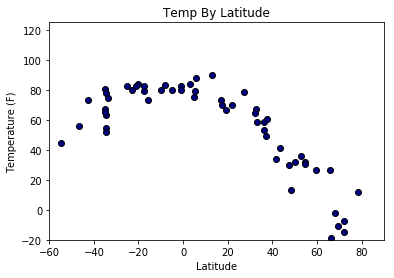

In [85]:
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature (F)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("Temp By Latitude")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

plt.savefig("TempByLatitude.png")
plt.show()

### Latitude vs. Humidity

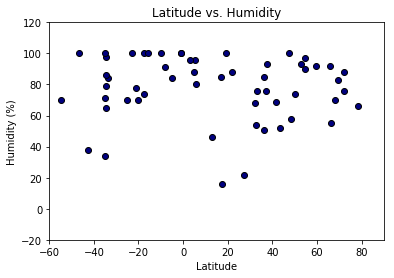

In [86]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Humidity (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,120)

plt.savefig("LatitudeVsHumidity.png")
plt.show()

### Latitude vs. Cloudiness

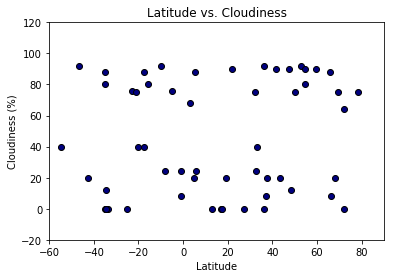

In [87]:
x_axis = cities_df['Latitude']
y_axis = cities_df['Cloudiness (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)

plt.savefig("LatitudeVsCloudiness.png")
plt.show()

### Latitude vs. Wind Speed

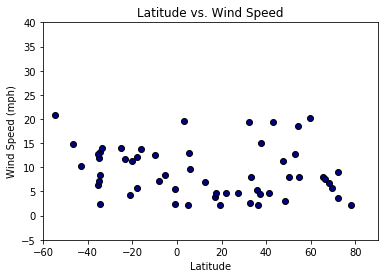

In [89]:
x_axis = cities_df['Latitude']
y_axis = cities_df['Wind Speed (mph)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

plt.savefig("LatitudeVsWindSpeed.png")
plt.show()